# Loan Data - Random Forest

This project will make use of a publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). 

The goal of this notebook is to predict who will have a high probability of paying someone back. 

#### Step 1: Import the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Step 2: Get the Data

In [2]:
df = pd.read_csv('loan_data.csv')

#### Step 3: Data Exploration

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The dataset consists of the following columns:
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
 installment: The monthly installments owed by the borrower if the loan is funded.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
- log.annual.inc: The natural log of the self-reported annual income of the borrower.

The predictions will be made on the column "not.fully.paid"

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Step 4: Create some data visualisations

Text(0.5, 1.0, 'Fig. 1: Histogram of the fico score vs credit policy')

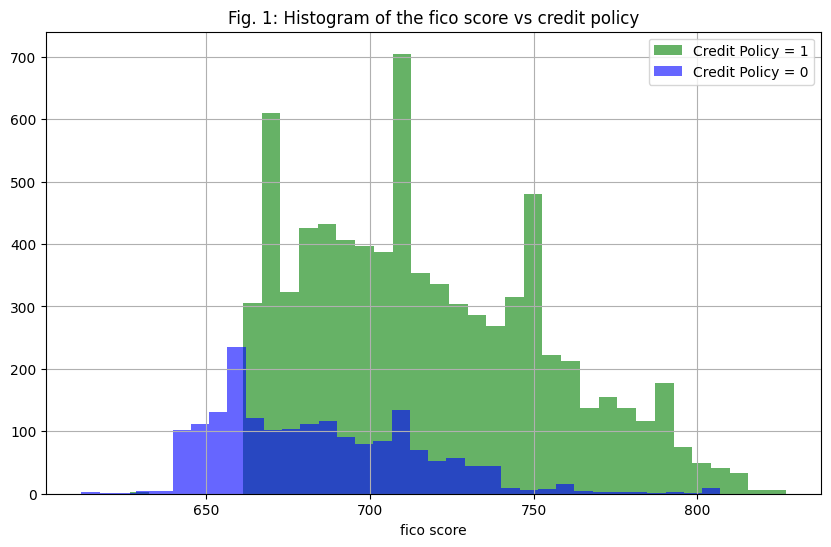

In [14]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=35, color='green', label='Credit Policy = 1', alpha=0.6)
df[df['credit.policy']==0]['fico'].hist(bins=35, color='blue', label='Credit Policy = 0', alpha=0.6)
plt.legend()
plt.xlabel('fico score')
plt.title('Fig. 1: Histogram of the fico score vs credit policy')

According to Fig. 1, people who have a lower fico score (< 660) have credit policy of 0.

Text(0.5, 1.0, 'Fig. 2: Histogram of the fico score vs Not Fully Paid')

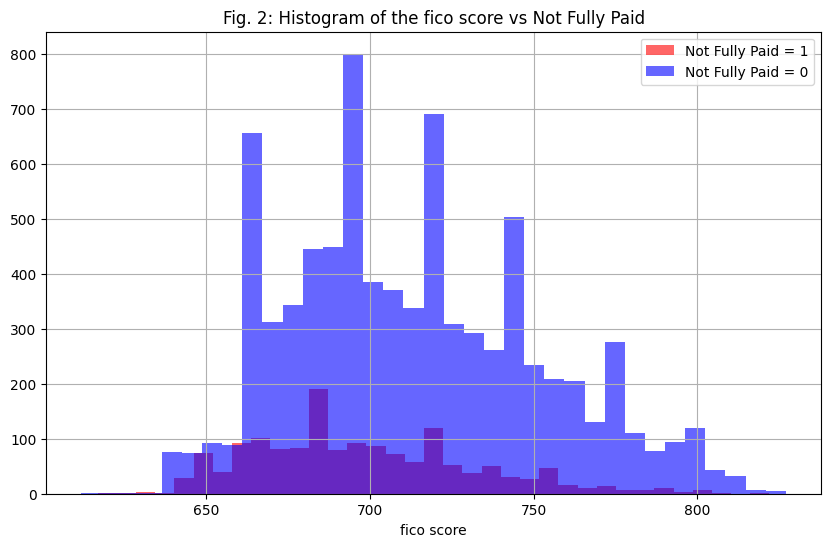

In [19]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=35, color='red', label='Not Fully Paid = 1', alpha=0.6)
df[df['not.fully.paid']==0]['fico'].hist(bins=35, color='blue', label='Not Fully Paid = 0', alpha=0.6)
plt.legend()
plt.xlabel('fico score')
plt.title('Fig. 2: Histogram of the fico score vs Not Fully Paid')

According to Fig. 2 the majority of people are fully paying off their loans.

Text(0.5, 1.0, 'Fig. 3: Countplot of loans by purpose')

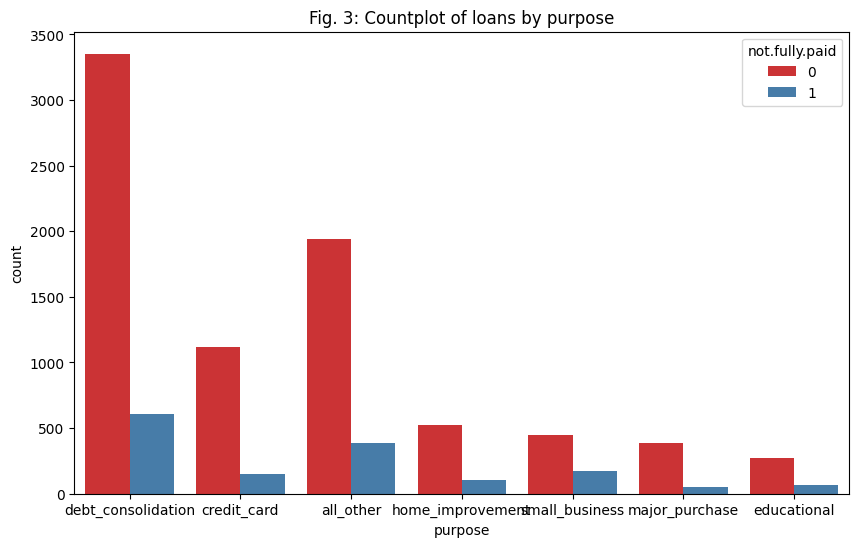

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')
plt.title('Fig. 3: Countplot of loans by purpose')

In Fig. 3 you can see that debt_consolidation has the highest count of wanting a loan. Interestingly, the ratio between fully paid and not seems to be similar between all the reasons. 

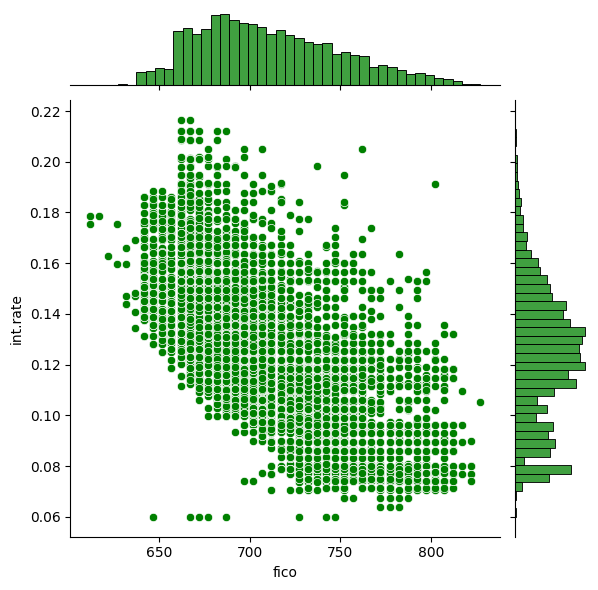

In [25]:
sns.jointplot(x='fico',y='int.rate', data=df, color='green')

As the fico score increases, so does the interest rate and vice versa. 

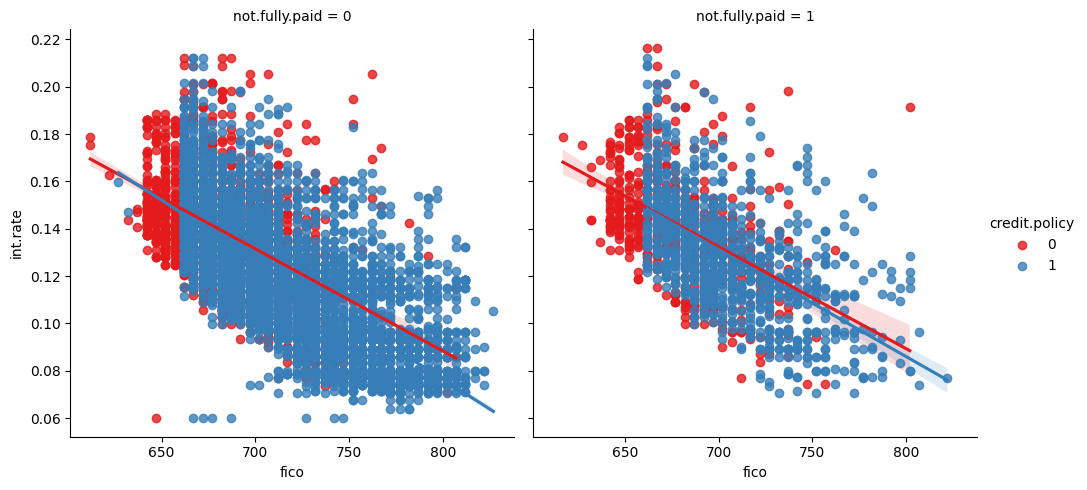

In [28]:
sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy', col='not.fully.paid', palette='Set1')

In the lmplots you can see that the behavior is relatively similar whether or not a loan was fully paid off or not and whether or not the person was denied the credit policy.

#### Step 5: Get the data ready

The column 'purpose' needs to be tranformed first. 

In [29]:
category_features = ['purpose']

In [30]:
final_data = pd.get_dummies(df, columns=category_features, drop_first=True)

In [31]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

#### Step 6: Split the data

In [32]:
from sklearn.model_selection import train_test_split

In [37]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Step 7: Import the Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
decision_tree = DecisionTreeClassifier()

#### Step 8: Fit the model to the training data and make predictions

In [40]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
predictions = decision_tree.predict(X_test)

#### Step 9: Evaluate the Decision Tree model

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1997  434]
 [ 341  102]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



#### Step 10: Import the Random Forest Classifier and fit the data

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_forest = RandomForestClassifier(n_estimators=300)

In [46]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [47]:
rf_predictions = random_forest.predict(X_test)

#### Step 11: Evaluate the Random Forest model

In [49]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [50]:
print(confusion_matrix(y_test, rf_predictions))

[[2423    8]
 [ 434    9]]


The Random Forest perfomed much better in this case compared to the Decicion Tree. It labeled 8 and 434 incorrectly instead of 434 and 341. But not in all cases. Especially for class 1